<div style='background-image: url("./share/header_no_text.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Introduction to File Formats and read/write in ObsPy</div>
        </div>
    </div>
</div>

![](images/obspy_logo_full_524x179px.png)

This is oftentimes not taught, but fairly important to understand, at least at a basic level. This also teaches you how to work with these in ObsPy.

**This notebook aims to give a quick introductions to ObsPy's core functions and classes. Everything here will be repeated in more detail in later notebooks.**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## SEED Identifiers

According to the  [SEED standard](www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf), which is fairly well adopted, the following nomenclature is used to identify seismic receivers:

* **Network code**: Identifies the network/owner of the data. Assigned by the FDSN and thus unique.
* **Station code**: The station within a network. *NOT UNIQUE IN PRACTICE!* Always use together with a network code!
* **Location ID**: Identifies different data streams within one station. Commonly used to logically separate multiple instruments at a single station.
* **Channel codes**: Three character code: 1) Band and approximate sampling rate, 2) The type of instrument, 3) The orientation

This results in full ids of the form **NET.STA.LOC.CHAN**, e.g. **KG.TJN..HHE**.


---


In seismology we generally distinguish between three separate types of data:

1. **Waveform Data** - The actual waveforms as time series.
2. **Station Data** - Information about the stations' operators, geographical locations, and the instrument's responses.
3. **Event Data** - Information about earthquakes.

Some formats have elements of two or more of these.

## Waveform Data

![stream](images/Stream_Trace.svg)

There are a myriad of waveform data formats but in Europe and the USA two formats dominate: **MiniSEED** and **SAC**


### MiniSEED

* This is what you get from datacenters and also what they store, thus the original data
* Can store integers and single/double precision floats
* Integer data (e.g. counts from a digitizer) are heavily compressed: a factor of 3-5 depending on the data
* Can deal with gaps and overlaps
* Multiple components per file
* Contains only the really necessary parameters and some information for the data providers

In [2]:
import obspy

# ObsPy automatically detects the file format.
st = obspy.read("data/TJN_20190615.mseed")
print(st)
print('#'*100)
# Fileformat specific information is stored here.
print(st[0].stats.mseed)

3 Trace(s) in Stream:
KG.TJN..HHN | 2019-06-21T20:59:59.998392Z - 2019-06-21T21:01:59.998392Z | 100.0 Hz, 12001 samples
KG.TJN..HHE | 2019-06-21T20:59:59.998392Z - 2019-06-21T21:01:59.998392Z | 100.0 Hz, 12001 samples
KG.TJN..HHZ | 2019-06-21T20:59:59.998392Z - 2019-06-21T21:01:59.998392Z | 100.0 Hz, 12001 samples
####################################################################################################
AttribDict({'dataquality': 'D', 'number_of_records': 43, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 64000})


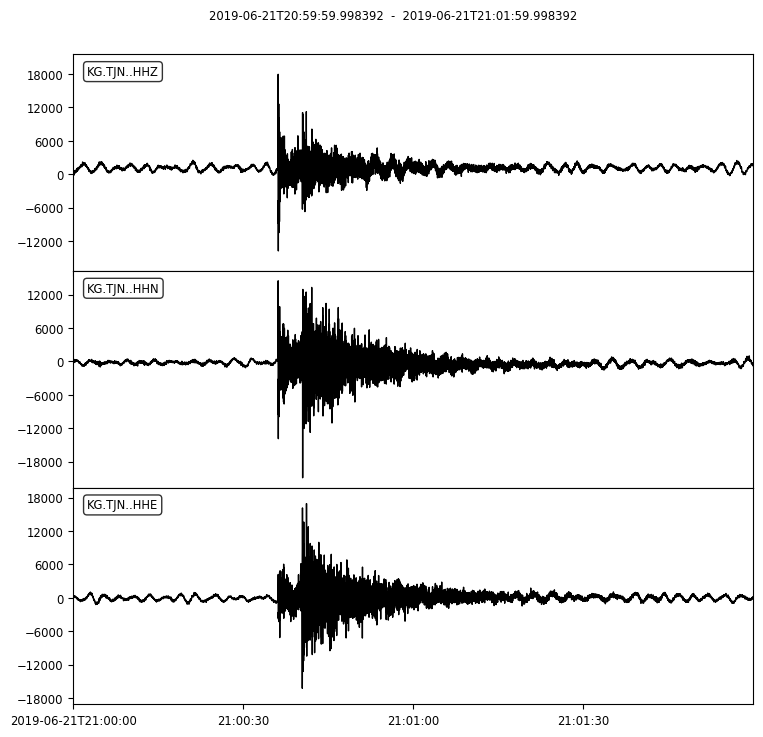

In [3]:
st.plot();

1 Trace(s) in Stream:
KG.TJN..HHZ | 2019-06-21T20:59:59.998392Z - 2019-06-21T21:01:59.998392Z | 100.0 Hz, 12001 samples


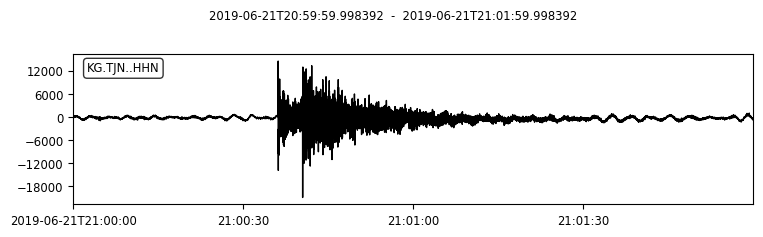

###### Detrend & Tapering & Lowpass filter #######


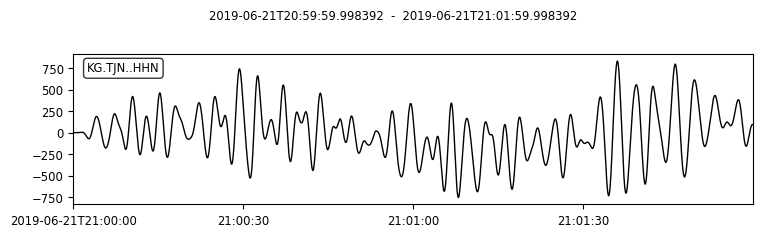

In [4]:
# This is a quick interlude to teach you basics about how to work
# with Stream/Trace objects.

# Most operations work in-place, e.g. they modify the existing
# objects. We'll create a copy here.
st2 = st.copy()

# To use only part of a Stream, use the select() function.
print(st2.select(component="Z"))

# Stream objects behave like a list of Trace objects.
tr = st2[0]

tr.plot();

# Some basic processing. Please note that these modify the
# existing object.
print("###### Detrend & Tapering & Lowpass filter #######")
tr.detrend("linear")
tr.taper(type="hann", max_percentage=0.05)
tr.filter("lowpass", freq=0.5)

tr.plot();

In [5]:
# You can write it again by simply specifing the format.
st.write("temp.mseed", format="mseed")

### Gap/Overlap 체크
* 
* https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.get_gaps.html?highlight=gap#obspy.core.stream.Stream.get_gaps

Source            Last Sample                 Next Sample                 Delta           Samples 
KG.TJN..HHE       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
KG.TJN..HHN       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
KG.TJN..HHZ       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
Total: 3 gap(s) and 0 overlap(s)
None


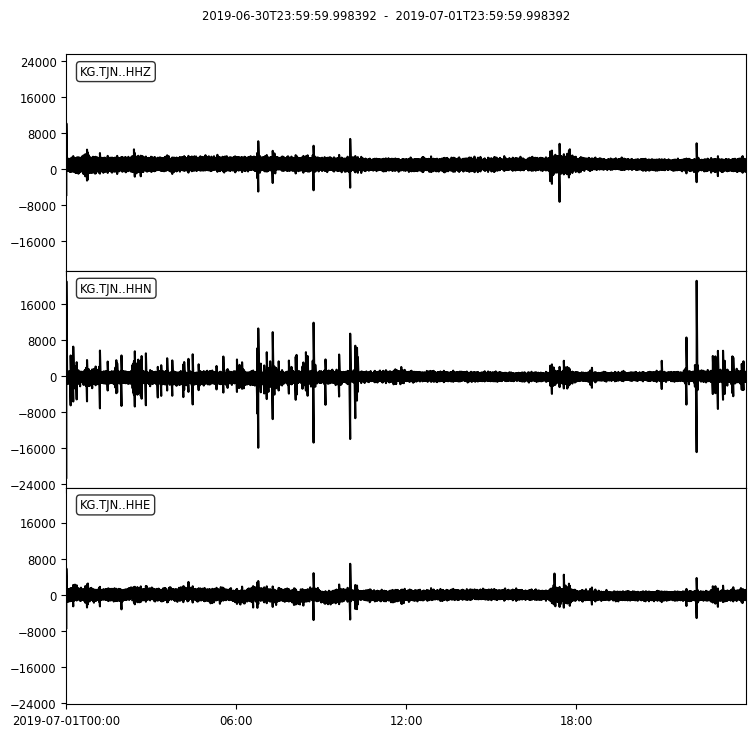

In [6]:
### Gap check
from obspy import UTCDateTime

st = obspy.read('data/TJN_gap.mseed')
print(st.print_gaps())
st.plot();

Source            Last Sample                 Next Sample                 Delta           Samples 
KG.TJN..HHE       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
KG.TJN..HHN       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
KG.TJN..HHZ       2019-07-01T02:17:31.958392Z 2019-07-01T02:19:34.968392Z 123.000000      12300   
Total: 3 gap(s) and 0 overlap(s)
None


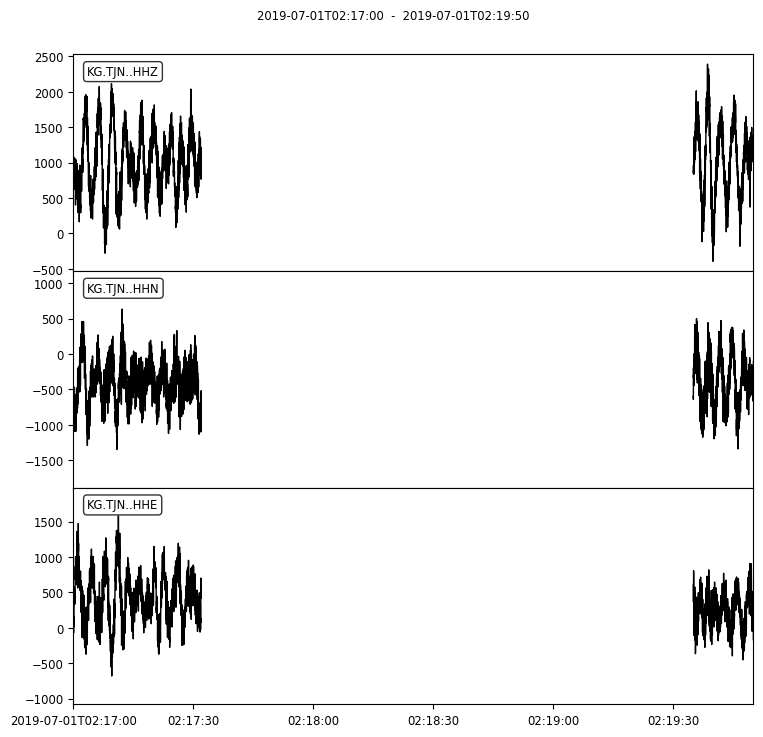

In [7]:
## show gap
print(st.print_gaps())
st.plot(starttime=UTCDateTime('2019-07-01T02:17:00Z'), endtime=UTCDateTime('2019-07-01T02:19:50'));

In [8]:
### Overlap check
st = obspy.read("data/20190419_021641.mseed")
print(st.__str__(extended=True))

34 Trace(s) in Stream:
KS.SKC2..HGZ | 2019-04-19T02:16:38.238393Z - 2019-04-19T02:19:44.198393Z | 100.0 Hz, 18597 samples
KG.YKB..HGZ  | 2019-04-19T02:16:40.398390Z - 2019-04-19T02:19:44.818390Z | 100.0 Hz, 18443 samples
KG.YKB..HHZ  | 2019-04-19T02:16:39.258390Z - 2019-04-19T02:19:43.848390Z | 100.0 Hz, 18460 samples
KS.WJU2..HGZ | 2019-04-19T02:16:37.238393Z - 2019-04-19T02:19:45.448393Z | 100.0 Hz, 18822 samples
KS.WJU2..HGZ | 2019-04-19T02:16:37.238393Z - 2019-04-19T02:19:45.448393Z | 100.0 Hz, 18822 samples
KS.JECB..HGZ | 2019-04-19T02:16:36.828393Z - 2019-04-19T02:19:44.558393Z | 100.0 Hz, 18774 samples
KS.JECB..HGZ | 2019-04-19T02:16:36.828393Z - 2019-04-19T02:19:44.558393Z | 100.0 Hz, 18774 samples
KS.CHC2..HGZ | 2019-04-19T02:16:36.578393Z - 2019-04-19T02:19:44.328393Z | 100.0 Hz, 18776 samples
KS.CHC2..HGZ | 2019-04-19T02:16:36.578393Z - 2019-04-19T02:19:44.328393Z | 100.0 Hz, 18776 samples
KS.CHC2..HHZ | 2019-04-19T02:16:37.878394Z - 2019-04-19T02:19:42.268394Z | 100.0 Hz, 1

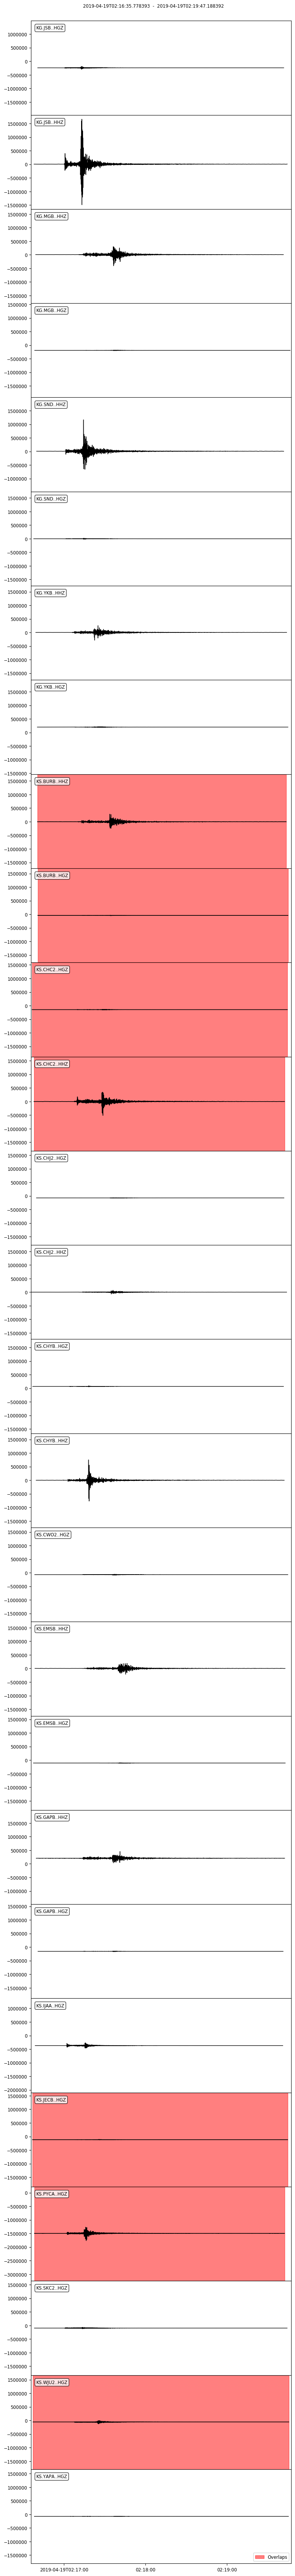

In [9]:
st.plot();

### SAC

* Custom format of the `sac` code.
* Simple header and single precision floating point data.
* Only a single component per file and no concept of gaps/overlaps.
* Used a lot due to `sac` being very popular and the additional basic information that can be stored in the header.

In [10]:
st = obspy.read("data/TJN_HHZ_2019090615.sac")
print(st)
st[0].stats.sac.__dict__

1 Trace(s) in Stream:
KG.TJN..HHZ | 2019-06-14T23:59:59.998392Z - 2019-06-16T23:59:59.998392Z | 100.0 Hz, 17280001 samples


{'delta': 0.0099999998,
 'b': -0.001608,
 'e': 172800.0,
 'internal0': 1.0,
 'cmpaz': 0.0,
 'cmpinc': 0.0,
 'nzyear': 2019,
 'nzjday': 166,
 'nzhour': 0,
 'nzmin': 0,
 'nzsec': 0,
 'nzmsec': 0,
 'nvhdr': 6,
 'norid': 0,
 'nevid': 0,
 'npts': 17280001,
 'iftype': 1,
 'idep': 5,
 'iztype': 11,
 'ievtyp': 40,
 'leven': 1,
 'lpspol': 1,
 'lovrok': 1,
 'lcalda': 1,
 'unused23': 0,
 'kstnm': 'TJN     ',
 'kevnm': '191660000HHZ    ',
 'khole': '        ',
 'kcmpnm': 'HHZ     ',
 'knetwk': 'KG      '}

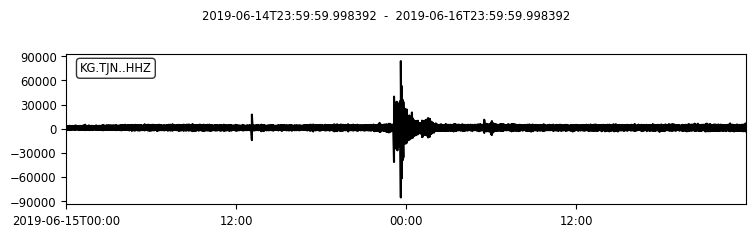

In [11]:
st.plot();

In [12]:
# You can once again write it with the write() method.
st.write("temp.sac", format="sac")

## Station Data

![inv](images/Inventory.svg)

Station data contains information about the organziation that collections the data, geographical information, as well as the instrument response. It mainly comes in three formats:

* `(dataless) SEED`: Very complete but pretty complex and binary. Still used a lot, e.g. for the Arclink protocol
* `RESP`: A strict subset of SEED. ASCII based. Contains **ONLY** the response.
* `StationXML`: Essentially like SEED but cleaner and based on XML. Most modern format and what the datacenters nowadays serve. **Use this if you can.**


ObsPy can work with all of them but today we will focus on StationXML.

They are XML files:

In [13]:
!head data/all_stations.xml

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [14]:
import obspy

# Use the read_inventory function to open them.
inv = obspy.read_inventory("data/all_stations.xml")
print(inv)

Inventory created at 2015-05-13T23:31:49.000000Z
	Sending institution: SeisComP3 (INGV)
	Contains:
		Networks (3):
			IV, MN, SI
		Stations (9):
			IV.BDI (BAGNI DI LUCCA)
			IV.BOB (BOBBIO)
			IV.CAVE (CAVE)
			IV.PESA (PESARO)
			IV.PRMA (Parma)
			IV.SALO (Salo)
			IV.TEOL (Teolo)
			MN.VLC (Villacollemandina, Italy)
			SI.LUSI (Lusi)
		Channels (47):
			IV.BDI..BHZ, IV.BDI..BHN, IV.BDI..BHE, IV.BDI..HHZ, IV.BDI..HHN, 
			IV.BDI..HHE, IV.BOB..BHZ, IV.BOB..BHN, IV.BOB..BHE, IV.BOB..HHZ, 
			IV.BOB..HHN, IV.BOB..HHE, IV.CAVE..HHZ, IV.CAVE..HHN, IV.CAVE..HHE
			IV.PESA..BHZ, IV.PESA..BHN, IV.PESA..BHE, IV.PESA..HHZ, 
			IV.PESA..HHN, IV.PESA..HHE, IV.PRMA..BHZ, IV.PRMA..BHN, 
			IV.PRMA..BHE, IV.PRMA..HHZ, IV.PRMA..HHN, IV.PRMA..HHE, 
			IV.SALO..BHZ, IV.SALO..BHN, IV.SALO..BHE, IV.SALO..HHZ, 
			IV.SALO..HHN, IV.SALO..HHE, IV.TEOL..BHZ, IV.TEOL..BHN, 
			IV.TEOL..BHE, IV.TEOL..HHZ, IV.TEOL..HHN, MN.VLC..BHZ, MN.VLC..BHN
			MN.VLC..BHE, MN.VLC..HHZ, MN.VLC..HHN, MN.VLC..HHE, SI.LUSI..H

You can see that they can contain an arbirary number of networks, stations, and channels.

In [15]:
import os
#os.environ['PROJ_LIB'] = 'C:\ProgramData\Anaconda3\Library\share'
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\Library\share'


#### PROJ_LIB ERROR 발생 시(windows)
* 명령 프로그램트 실행 -> 최상위 디렉토리로 이동
* 다음 명령어로 epsg가 있는 디렉토리 검색
* where /r "Directory_Name" epsg.*
* ex) C:\> where /r "ProgramData" epsg.*


C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:387: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  width=width, height=height, ax=ax)
C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:435: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap.drawcountries(color="0.75")


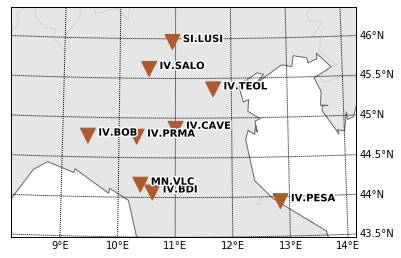

In [16]:
# ObsPy is also able to plot a map of them.
inv.plot(projection="local");

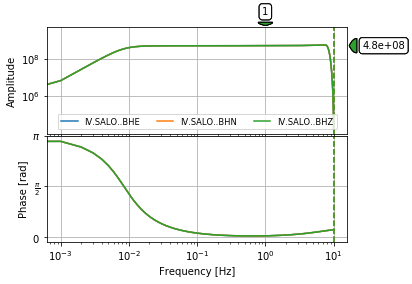

In [17]:
# As well as a plot the instrument response.
inv.select(network="IV", station="SALO", channel="BH?").plot_response(0.001);

In [18]:
# Coordinates of single channels can also be extraced. This function
# also takes a datetime arguments to extract information at different
# points in time.
inv.get_coordinates("IV.SALO..BHZ")

{'latitude': 45.6183,
 'longitude': 10.5243,
 'elevation': 600.0,
 'local_depth': 1.0}

In [19]:
# And it can naturally be written again, also in modified state.
inv.select(channel="BHZ").write("temp.xml", format="stationxml")

## Event Data

![events](./images/Event.svg)

Event data is essentially served in either very simple formats like NDK or the CMTSOLUTION format used by many waveform solvers:

In [20]:
!cat data/GCMT_2014_04_01__Mw_8_1

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


Datacenters on the hand offer **QuakeML** files, which are surprisingly complex in structure but can store complex relations.

In [21]:
# Read QuakeML files with the read_events() function.
cat = obspy.read_events("data/GCMT_2014_04_01__Mw_8_1.xml")
print(cat)

1 Event(s) in Catalog:
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc


In [22]:
print(cat[0])

Event:	2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc

	                  resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=4597319")
	                   event_type: 'earthquake'
	          preferred_origin_id: ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#cmtorigin")
	 preferred_focal_mechanism_id: ResourceIdentifier(id="smi:ds.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A/quakeml#focalmechanism")
	                         ---------
	           event_descriptions: 1 Elements
	             focal_mechanisms: 1 Elements
	                      origins: 2 Elements
	                   magnitudes: 1 Elements


C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:348: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  lon_0=round(mean_longitude(lons), 4), ax=ax)
C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:435: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap.drawcountries(color="0.75")


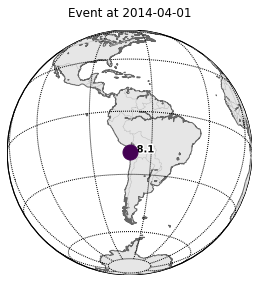

In [23]:
cat.plot(projection="ortho");

In [24]:
# Once again they can be written with the write() function.
cat.write("temp_quake.xml", format="quakeml")

To show off some more things, I added a file containing all events from 2014 in the GCMT catalog.

In [25]:
import obspy

cat = obspy.read_events("data/2014.ndk")

print(cat)

2463 Event(s) in Catalog:
2014-04-01T01:59:46.300000Z | -34.990, -108.410 | 4.79 Mwc
2014-04-01T05:05:57.500000Z | +48.940, -129.570 | 5.07 Mwc
...
2014-09-30T22:34:31.500000Z | -17.850, -178.590 | 5.46 Mwc
2014-09-30T23:23:01.500000Z | +56.740,  -34.460 | 4.91 Mwc
To see all events call 'print(CatalogObject.__str__(print_all=True))'


C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:343: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
C:\ProgramData\Anaconda3\lib\site-packages\obspy\imaging\maps.py:435: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap.drawcountries(color="0.75")


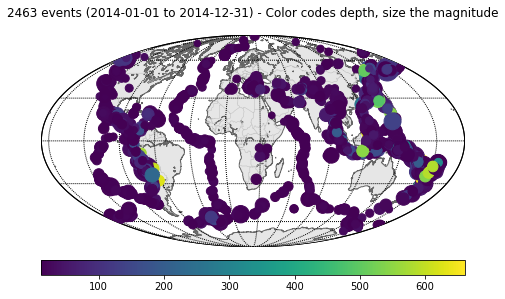

In [26]:
cat.plot();

In [27]:
cat.filter("depth > 100000", "magnitude > 7")

2 Event(s) in Catalog:
2014-06-23T20:53:33.700000Z | +52.000, +178.430 | 7.92 Mwc
2014-11-01T18:57:29.900000Z | -19.760, -177.610 | 7.11 Mwc